##A model that can predict the lowest salary an actuary can earn based on:
1)The Industry .eg (Healthcare,Pension) 
2)The number of exprience years 
3)The exam he/she did eg(ASA,FSA)

In [2]:
#The libraries used in cleaning,exploring, building and deploying the model
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
import warnings
from glob import glob
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
#Function used in wrangling the data
def wrangle(filepath):
    AS=pd.read_csv(filepath)
    #removing the salary column
    mask_salary=AS.drop(columns=["salary"])
    AS=mask_salary
    #droping the leakages
    AS=AS.drop(columns=["salary_mid","salary_high"])
    return(AS)

In [4]:
AS=wrangle("C:/Users/musyo/Downloads/Datasets-20240315/actuary_salaries.csv")
AS.head(5)

,industry,exams,experience,salary_low
0,Casualty,1 Exam,1,48
1,Casualty,2 Exams,1,50
2,Casualty,3 Exams,1,54
3,Casualty,4 Exams,1,58
4,Casualty,1 Exam,3,54


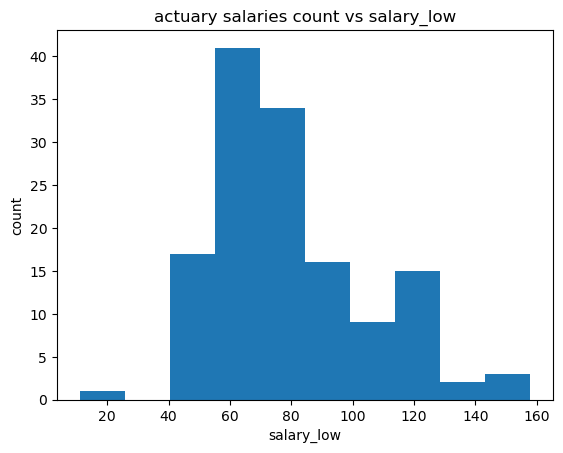

In [5]:
plt.hist(AS["salary_low"]),
plt.xlabel("salary_low"),
plt.ylabel("count"),
plt.title("actuary salaries count vs salary_low");

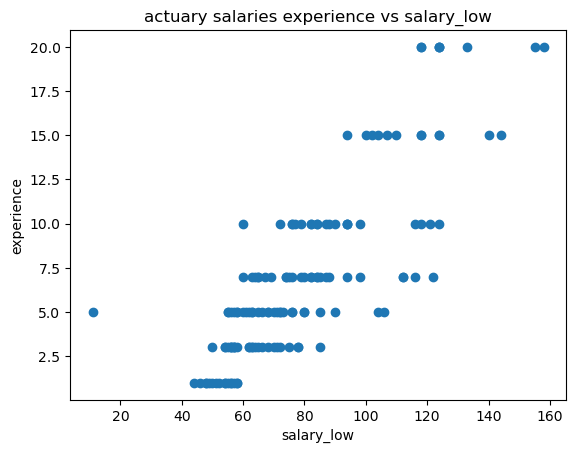

In [6]:
plt.scatter(AS["salary_low"],AS["experience"])
plt.xlabel("salary_low"),
plt.ylabel("experience"),
plt.title("actuary salaries experience vs salary_low");

In [7]:
#spliting the data into a feature matrics and a target vector
feature=["industry","exams","experience"] #data used to make the prediction
target="salary_low" #what we are intrested in predicting
X_train=AS[feature]
y_train=AS[target]

In [8]:
#building a baseline model
y_mea=y_train.mean()
y_pred_baseline=[y_mea]*len(y_train)
mea_baseline=mean_absolute_error(y_train,y_pred_baseline)
print("salary mea",round(y_mea,2))
print("Baseline mea",round(mea_baseline,2))

salary mea 79.43
Baseline mea 20.33


In [9]:
#Iterating the model
model=make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge(),
)
model.fit(X_train,y_train),

(Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(cols=['industry', 'exams'], use_cat_names=True)),
                 ('ridge', Ridge())]),)

In [10]:
y_pred_training =model.predict(X_train)
y_pred_training[:5]

array([50.01156772, 47.14118013, 55.66588143, 58.80873857, 56.0381264 ])

In [11]:
mae_training =mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 4.74


In [12]:
#Communicating the Results
def make_prediction(industry ,exams,experience):
    data={
        "industry":industry,
        "exams":exams,
        "experience":experience,
        }
    df=pd.DataFrame(data,index=[0])
    prediction =model.predict(df).round(2)[0]
    return f"Predicted salary_low: {prediction}"

In [13]:
make_prediction("Pension","4" , 17)

'Predicted salary_low: 101.47'

In [14]:
interact(
      make_prediction,
    industry=Dropdown(options=sorted(X_train["industry"].unique())),
    exams=Dropdown(options=sorted(X_train["exams"].unique())),
    
    experience=IntSlider(
        min=X_train["experience"].min(),
        max=X_train["experience"].max(),
        value=X_train["experience"].mean(),
    ),
);

interactive(children=(Dropdown(description='industry', options=('Casualty', 'Health', 'Life', 'Pension'), valu…